In [10]:
# 24 May 2025
from IPython.display import display
from IPython.display import HTML

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import pearsonr



from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px



import numpy as np
import os 



from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler



cwd = os.getcwd() 
env_name = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', 'Localhost')


if(env_name == "Localhost"):
    df_gdp = pd.read_csv("../../datasets/New/gdp_per_capita.csv")
    df_olympic = pd.read_csv("../../datasets/New/olympic_events.csv")
    df_nuclear_weapon = pd.read_csv("../../datasets/New/nuclear_weapons_country_2025.csv")
else: 
    df_gdp = pd.read_csv("/kaggle/input/olympic-gdp/gdp_per_capita.csv")
    df_olympic = pd.read_csv("/kaggle/input/olympic-gdp/olympic_events.csv")





get_start_year = 1990
get_end_year = 2024


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def plot_nuclear_vs_olympic_medals(df_nuclear_weapon, df_olympic, start_year=None, end_year=None, top_n=10):
    # Step 1: Prepare the nuclear weapons data
    nuclear_countries = df_nuclear_weapon[['country', 'NuclearWeapons_TotalNuclearWarheads_num_2024']].copy()
    nuclear_countries = nuclear_countries.rename(columns={'NuclearWeapons_TotalNuclearWarheads_num_2024': 'nuclear_weapons'})
    nuclear_countries['nuclear_weapons'] = pd.to_numeric(nuclear_countries['nuclear_weapons'], errors='coerce')

    # Step 2: Prepare Olympic medal data
    medal_winners = df_olympic[df_olympic['Medal'].notna()].copy()

    # Optional year filtering
    if start_year:
        medal_winners = medal_winners[medal_winners['Year'] >= start_year]
    if end_year:
        medal_winners = medal_winners[medal_winners['Year'] <= end_year]

    # Count medals by country using 'Team'
    medal_counts = medal_winners['Team'].value_counts().reset_index()
    medal_counts.columns = ['country', 'medal_count']

    # Keep only top N countries by medals
    top_countries = medal_counts.head(top_n)['country'].tolist()
    medal_counts_top = medal_counts[medal_counts['country'].isin(top_countries)]

    # Step 3: Merge with nuclear data
    merged_data = pd.merge(nuclear_countries, medal_counts_top, on='country', how='inner')  # only countries in top N
    merged_data = merged_data.dropna(subset=['nuclear_weapons'])

    # Step 4: Plot
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")
    sns.scatterplot(data=merged_data, x='nuclear_weapons', y='medal_count', hue='country', s=100)

    title_years = f"({start_year}–{end_year})" if start_year or end_year else "(All Time)"
    plt.title(f'Nuclear Weapons vs Olympic Medals by Country {title_years}\n(Top {top_n} Olympic Medal Winners)', fontsize=16)
    plt.xlabel('Number of Nuclear Weapons (2024)', fontsize=12)
    plt.ylabel('Total Olympic Medals Won', fontsize=12)
    plt.xscale('log')  # Log scale to spread nuclear data
    plt.grid(True)

    # Add country labels
    for i, row in merged_data.iterrows():
        plt.text(row['nuclear_weapons'], row['medal_count'] + 2, row['country'], fontsize=9)

    plt.tight_layout()
    plt.show()

    # Step 5: Correlation
    if len(merged_data) > 1:
        corr, p_value = pearsonr(merged_data['nuclear_weapons'], merged_data['medal_count'])
        print(f"Pearson correlation: {corr:.2f} (p-value: {p_value:.4f})")
    else:
        print("Not enough data for correlation calculation.")


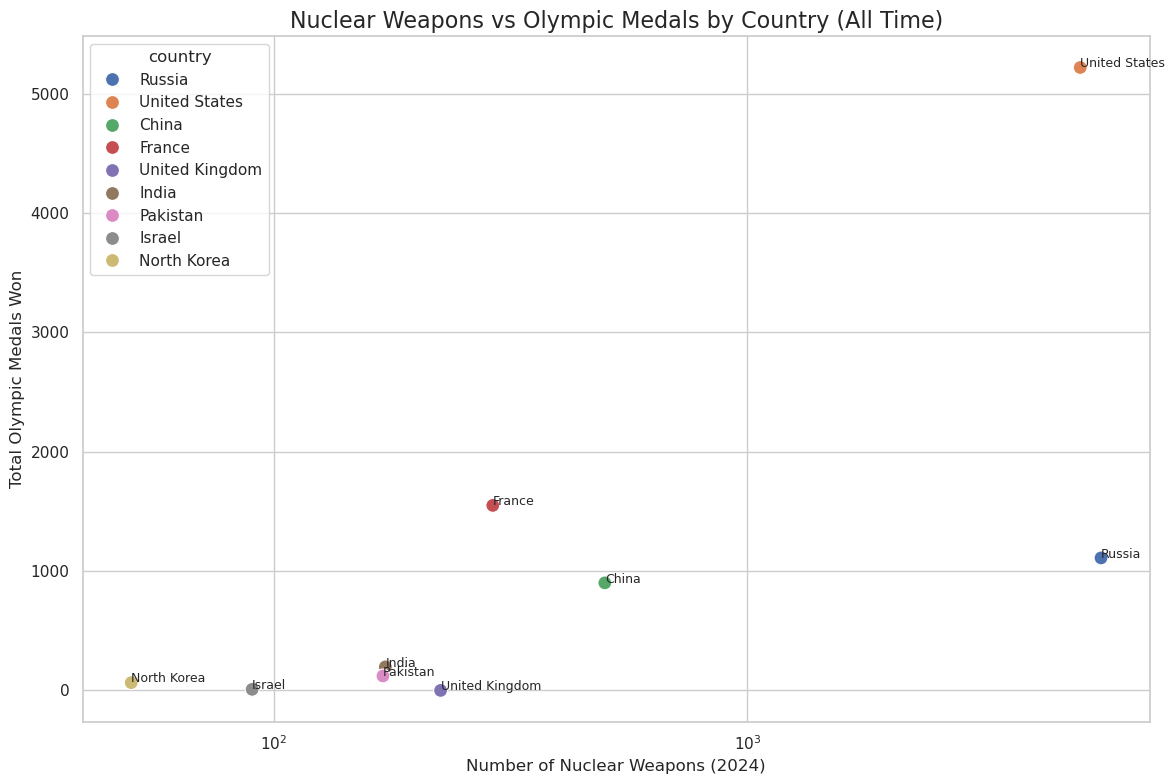

Pearson correlation: 0.70 (p-value: 0.0359)


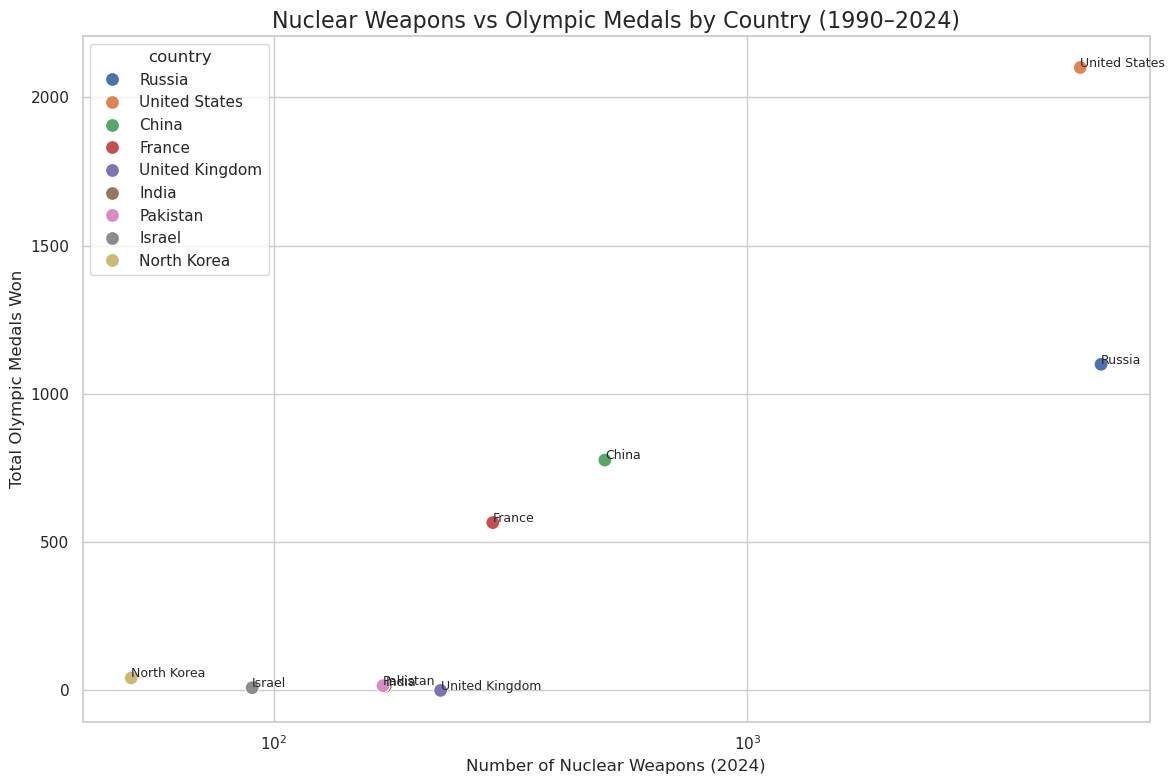

Pearson correlation: 0.85 (p-value: 0.0038)


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def plot_nuclear_vs_olympic_medals(df_nuclear_weapon, df_olympic, start_year=None, end_year=None):
    # Step 1: Prepare the nuclear weapons data
    nuclear_countries = df_nuclear_weapon[['country', 'NuclearWeapons_TotalNuclearWarheads_num_2024']].copy()
    nuclear_countries = nuclear_countries.rename(columns={'NuclearWeapons_TotalNuclearWarheads_num_2024': 'nuclear_weapons'})
    nuclear_countries['nuclear_weapons'] = pd.to_numeric(nuclear_countries['nuclear_weapons'], errors='coerce')

    # Step 2: Prepare Olympic medal data
    medal_winners = df_olympic[df_olympic['Medal'].notna()].copy()

    # Optional year filtering
    if start_year:
        medal_winners = medal_winners[medal_winners['Year'] >= start_year]
    if end_year:
        medal_winners = medal_winners[medal_winners['Year'] <= end_year]

    # Count medals by country using 'Team'
    medal_counts = medal_winners['Team'].value_counts().reset_index()
    medal_counts.columns = ['country', 'medal_count']

    # Step 3: Merge the datasets
    merged_data = pd.merge(nuclear_countries, medal_counts, on='country', how='left')
    merged_data['medal_count'] = merged_data['medal_count'].fillna(0)
    merged_data = merged_data.dropna(subset=['nuclear_weapons'])

    # Step 4: Create the visualization
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")
    sns.scatterplot(data=merged_data, x='nuclear_weapons', y='medal_count', hue='country', s=100)

    title_years = f"({start_year}–{end_year})" if start_year or end_year else "(All Time)"
    plt.title(f'Nuclear Weapons vs Olympic Medals by Country {title_years}', fontsize=16)
    plt.xlabel('Number of Nuclear Weapons (2024)', fontsize=12)
    plt.ylabel('Total Olympic Medals Won', fontsize=12)
    plt.xscale('log')  # Log scale for nuclear weapons
    plt.grid(True)

    # Add country labels
    for i, row in merged_data.iterrows():
        plt.text(row['nuclear_weapons'], row['medal_count'] + 2, row['country'], fontsize=9)

    plt.tight_layout()
    plt.show()

    # Step 5: Calculate Pearson correlation
    if len(merged_data) > 1:
        corr, p_value = pearsonr(merged_data['nuclear_weapons'], merged_data['medal_count'])
        print(f"Pearson correlation: {corr:.2f} (p-value: {p_value:.4f})")
    else:
        print("Not enough data for correlation calculation.")



# All-time analysis
plot_nuclear_vs_olympic_medals(df_nuclear_weapon, df_olympic)

# Or for a specific range, e.g., 1990–2024
plot_nuclear_vs_olympic_medals(df_nuclear_weapon, df_olympic, start_year=1990, end_year=2024)


In [20]:
def get_medal_owner_list(df_gdp, start_year=1990, end_year_=2024, top_n=15, include_countries=['Finland']):
    """
    Returns a styled table of top N countries by medal count within a specified year range.
    Always includes countries in include_countries even if not in top N.
    
    Parameters:
    - df: pandas DataFrame containing the Olympic dataset.
    - start_year: Start of the year range (inclusive).
    - end_year_: End of the year range (inclusive).
    - top_n: Number of top countries to return.
    - include_countries: List of country names (Team column) to include even if not in top N.
    
    Returns:
    - pandas Styler object with gradient styling.
    """

    # Filter by year and valid medals
    df_filtered = df_gdp[(df_gdp['Year'] >= start_year) & (df_gdp['Year'] <= end_year_) & df_gdp['Medal'].notna()]

    # Group medal counts
    medal_counts = df_filtered.groupby(['NOC', 'Medal']).size().unstack(fill_value=0)
    medal_counts = medal_counts.rename(columns={
        'Gold': 'Gold Medals',
        'Silver': 'Silver Medals',
        'Bronze': 'Bronze Medals'
    })
    medal_counts['Total Medals'] = medal_counts.sum(axis=1)

    # Map NOC to Team (country name)
    noc_team_map = df_filtered[['NOC', 'Team']].drop_duplicates().dropna()
    medal_counts = medal_counts.merge(noc_team_map, on='NOC', how='left').drop_duplicates('NOC')

    # Reorder columns
    medal_counts = medal_counts[['Team', 'Gold Medals', 'Silver Medals', 'Bronze Medals', 'Total Medals']]

    # Sort by total medals
    medal_counts_sorted = medal_counts.sort_values('Total Medals', ascending=False)

    # Identify included countries
    include_mask = medal_counts_sorted['Team'].isin(include_countries)
    
    # Select top N
    top_n_df = medal_counts_sorted.head(top_n)

    # Combine top N with included countries (avoid duplicates)
    combined_df = pd.concat([top_n_df, medal_counts_sorted[include_mask]])
    combined_df = combined_df.drop_duplicates(subset='Team', keep='first')
    
    # Re-sort for visual clarity
    combined_df = combined_df.sort_values('Total Medals', ascending=False)

    # Set index
    combined_df.index.name = 'NOC'

    # Style with gradient
    styled_table = combined_df.style.background_gradient(
        cmap='Blues',
        subset=['Gold Medals', 'Silver Medals', 'Bronze Medals', 'Total Medals']
    ).set_caption(f"Top {top_n} Medal-Winning Countries (+ Selected) ({start_year}–{end_year_})")

    return styled_table




styled_output = get_medal_owner_list(
    df_olympic, 
    start_year=get_start_year, 
    end_year_=get_end_year, 
    top_n=15, 
    include_countries=['Finland', 'India']
)

styled_output


,Team,Gold Medals,Silver Medals,Bronze Medals,Total Medals
NOC,,,,,
173,United States,984,636,561,2181
65,Germany,464,369,435,1268
141,Russia,389,360,399,1148
4,Australia,232,305,352,889
24,China,320,318,225,863
20,Canada,288,244,210,742
86,Italy,155,203,244,602
57,France,169,189,224,582
61,Great Britain,199,178,187,564


,Country Name,NOC,Average GDP Per Capita,Total Medals,Cluster
31,United Kingdom,GBR,20582.817294,2068,0
29,France,FRA,20121.759956,1777,0
42,Italy,ITA,17177.638745,1637,0
74,Sweden,SWE,26582.255836,1536,0
11,Canada,CAN,21692.293544,1352,0
3,Australia,AUS,22386.640523,1320,0
4,Austria,AUT,22185.730785,450,0
7,Belgium,BEL,21160.826561,468,0
60,Norway,NOR,35563.383962,1033,0
45,Japan,JPN,22720.769154,913,0


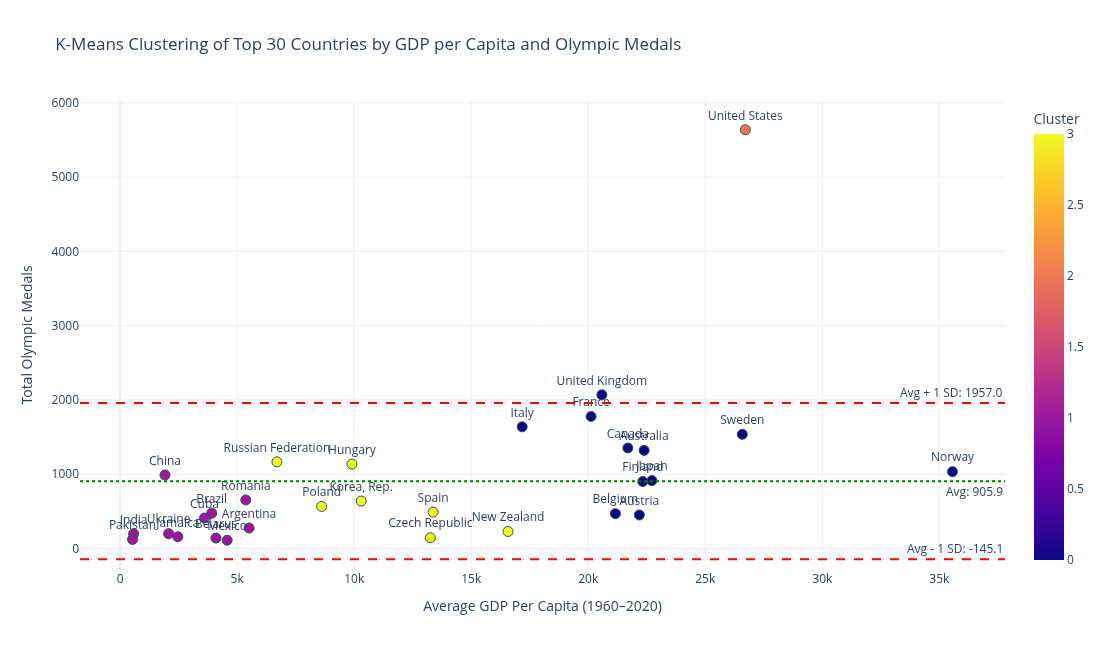

In [18]:
def cluster_gdp_vs_medals_plotly(df_gdp, df_olympic, top_n=30, n_clusters=4, random_state=42):
    # Load GDP data
   
    gdp_years = [str(y) for y in range(1960, 2021)]
    df_gdp[gdp_years] = df_gdp[gdp_years].replace('', np.nan).astype(float)
    df_gdp['Average GDP Per Capita'] = df_gdp[gdp_years].mean(axis=1)
    df_gdp_clean = df_gdp[['Country Name', 'Code', 'Average GDP Per Capita']].dropna()

    # Load Olympic data
    df_olympics = df_olympic
    df_medals = df_olympics[df_olympics['Medal'].notna()]
    medal_totals = df_medals.groupby('NOC').size().reset_index(name='Total Medals')

    # Merge GDP and medal data
    merged_df = medal_totals.merge(df_gdp_clean, left_on='NOC', right_on='Code')
    merged_df = merged_df[['Country Name', 'NOC', 'Average GDP Per Capita', 'Total Medals']]

    # Select top N countries by medals
    top_df = merged_df.sort_values(by='Total Medals', ascending=False).head(top_n).copy()

    # Normalize features for clustering
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(top_df[['Average GDP Per Capita', 'Total Medals']])

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    top_df['Cluster'] = kmeans.fit_predict(scaled_features)

    # Display styled table
    styled_table = top_df.sort_values(by='Cluster').style.background_gradient(
        subset=['Average GDP Per Capita', 'Total Medals'], cmap='viridis'
    )
    display(styled_table)

    # Calculate average and standard deviation of total medals
    avg_medals = top_df['Total Medals'].mean()
    std_medals = top_df['Total Medals'].std()

    # Create Plotly scatter plot
    fig = px.scatter(
        top_df,
        x='Average GDP Per Capita',
        y='Total Medals',
        color='Cluster',
        hover_name='Country Name',
        text='Country Name',
        hover_data={
            'Average GDP Per Capita': ':.2f',
            'Total Medals': True,
            'Cluster': True,
            'Country Name': False
        },
        title=f"K-Means Clustering of Top {top_n} Countries by GDP per Capita and Olympic Medals",
        template='plotly_white'
    )

    # Add average and std deviation lines
    fig.add_hline(y=avg_medals, line_dash='dot', line_color='green',
                  annotation_text=f"Avg: {avg_medals:.1f}", annotation_position="bottom right")
    fig.add_hline(y=avg_medals + std_medals, line_dash='dash', line_color='red',
                  annotation_text=f"Avg + 1 SD: {avg_medals + std_medals:.1f}", annotation_position="top right")
    fig.add_hline(y=avg_medals - std_medals, line_dash='dash', line_color='red',
                  annotation_text=f"Avg - 1 SD: {avg_medals - std_medals:.1f}", annotation_position="top right")

    fig.update_traces(
        marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')),
        textposition='top center'
    )

    fig.update_layout(
        xaxis_title="Average GDP Per Capita (1960–2020)",
        yaxis_title="Total Olympic Medals",
        legend_title="Cluster",
        height=650,
        width=1000
    )

    fig.show()

# Example usage
cluster_gdp_vs_medals_plotly(df_gdp, df_olympic)


<h1 style="line-height:3rem;"> Based on the graph, GDP per capita does not appear to significantly influence the total number of Olympic medals won.
 </h1>